# Upscaling.
(sobre-escalado). La idea es aumentar la resolucion de una imagen. Esto se usa para el mejoramiento de imagenes y para Autoencoders (tecnicas generativas).




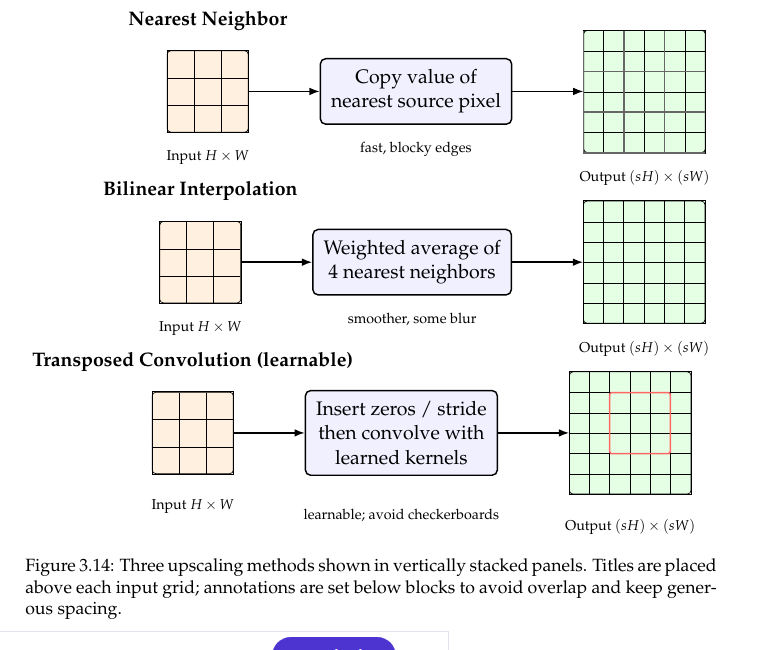

La imagen original esta en los puntos $(x,y)$
La imagen escalada esta en los puntos $(sx,sy)$, $s>0$.
Comenzamos con el vecino mas cercano.

## Nearest Neighbor Interpolation.
La idea es escoger el vecino mas cercano. Para explicarlo piense en una imagen de $2 \times 2$.

i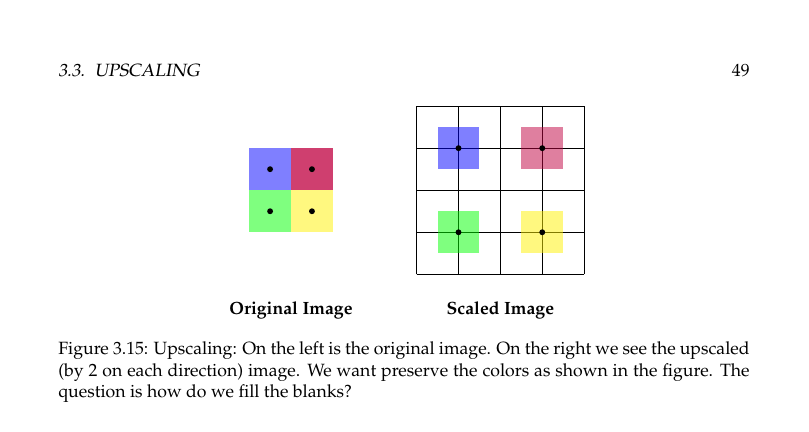

La figura orignal la vamos a escalar por 2 en cada dimension. O sea que de $2 \times 2 $ pixeles pasamos a $4 \times 4$ pixeles. Tomemos un punto, por ejemplo $(-1/2, 1/2$) al escalarlo por 2 tenemos $2(-1/2, 1/2)=(-1,1)$.  Por ejemplo $(1/4, 1/4)$

Al la interpolacion (" constante ") se $4 \times 4$ como se muestra en la figura.  3.16

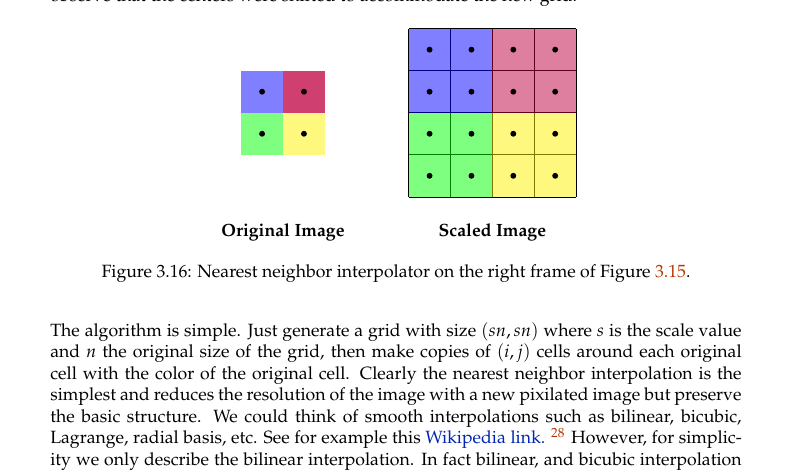

## Bilineal : en dos dimensiones.
Como lo dice la grafica de arriba es una promedio de los cuatro vecinos.
Describamosla matematicamente.

Sea $P=(x,y)$ un punto donde queremos saber el " color  ". Tenemos cuatro vecinos esquineros. $Q_{11}=(x_1, y_1), Q_{22}=(x_2, y_2), Q_{21}=(x_3, y_3) , Q_{22} = (x_4, y_4 ) $




i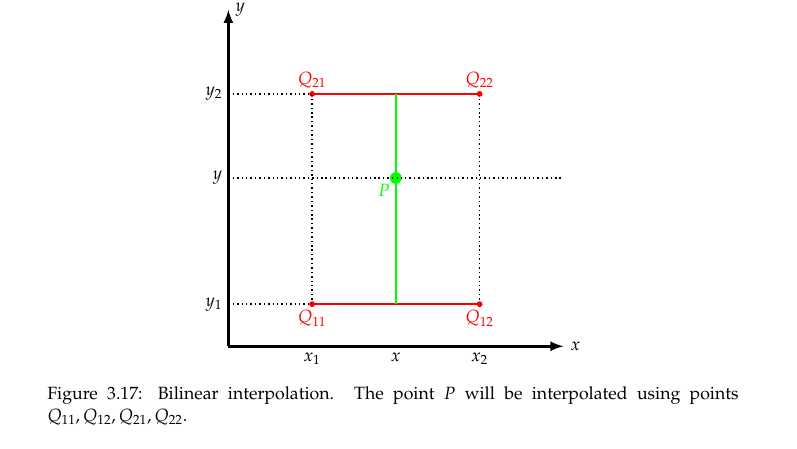

* Miremos la linea roja de abajo. La coordenada $x$, se puede interpolar de forma lineal como

$$ f(x, y_1) = \frac{x_2 - x}{x_2 - x_1}  f(Q_{11}) + \frac{x-x_1}{x_2 - x_1} f(Q_{12}) $$

* Miremos ahora la linea roja superior.
 $$ f(x, y_2) = \frac{x_2 - x}{x_2 - x_1}  f(Q_{21}) + \frac{x-x_1}{x_2 - x_1} f(Q_{22}) $$

 * Una vez tenemos los puntos arriba y abajo los usamos para interpolar pero esta vez a  lo largo del eje $y$ y se suano $f(x, y_1)$, $f(x,y_2)$.

 $$ f(x, y) = \frac{y_2 - y}{y_2 - y_1}  f(x,y_1) + \frac{y-y_1}{y_2 - y_1} (f(x,y_2) $$

 La implementacion de este algoritmo (tarea) produce la imagen en la figura 3.18.



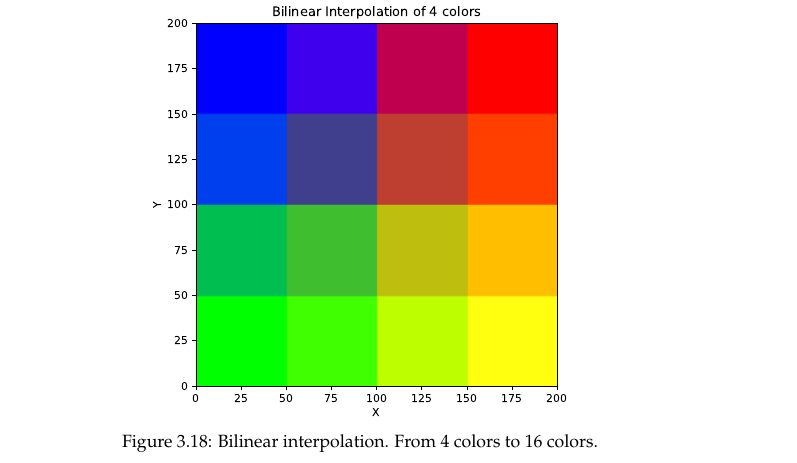

[El blog](https://unimatrixz.com/topics/ai-upscaler/upscaling-methods/#classical-upscalers-vs-ai-upscalers-key-differences) ilustra un cantidad de tecnicas de " upscaling"  interesante. Estas tecnicas junto PixelShuffle las resumo en la siguiente tabla.



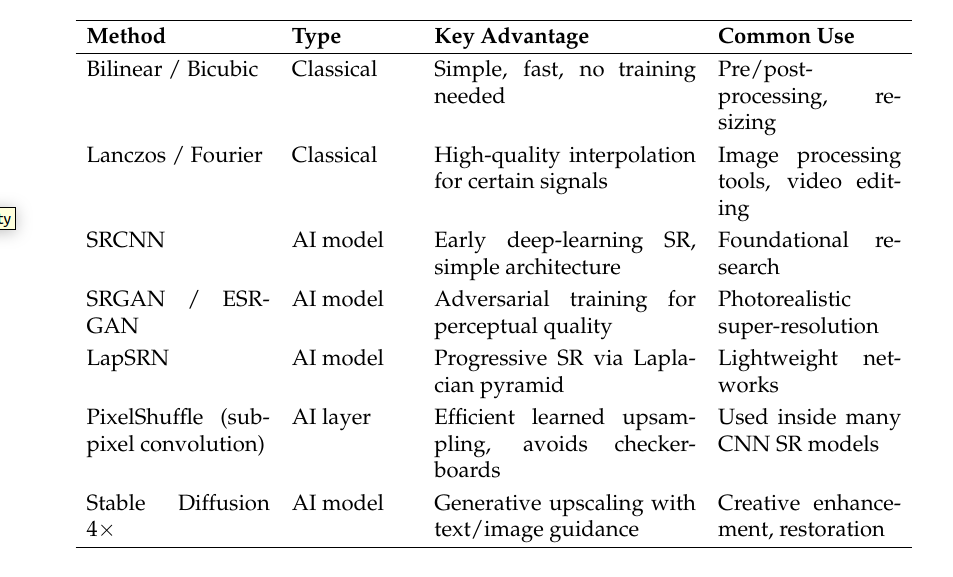

## Convolucion transpuesta.

Del procesamiento de senales si una salida $o$ viene de unos datos $I$ y un filtro $f$, de forma convolutiva

$$ o = I \ast f  $$
Si existe un filtro inverso (inverse filter) entonces podemos convolucionar a ambos por $f^{-1}$ a derecha

$$I = o \ast f^{-1}  $$
A esto se le llama **deconvolucion** en procesamiento de senales.
Pero aca ese termino no se debe usar. Como veremos el termino correcto es " convolucion transpuesta"

Una manera de entender la convolucion  es usando matrices.

### Convolucion vista como la multiplicacion de una matriz por un vector.
Recordemos de la definicion de convolucion

$$z_j = x_i \ast y_i = \sum_{i=0}^{N_y-1}  y_i x_{i+j} \quad , \quad j=0,1, \cdots , N_x - N_y  \tag{1} $$
donde $N_x$ es el numero de muestras (datos) y $N_y$  son el numero de coeficientes del filtro. $z_j$ tiene resultados $j=0, \cdots, , N_x - N_y$ de forma que la dimension de salida es $N_x - N_y + 1$. Veamos que esto es asi, en que rango de valores esta $j$

$$0, 1, \cdots, N_y - 1 $$
Ahora $i+j$

$$0,1, \cdots N_y -1  + N_x - N_y  $$
$$0, 1, \cdots, N_x - 1. $$

De la ecuacion (1) se ve que podemos escribir $Z$ como un producto de una matriz por un vector.

$$Z = Y X  $$





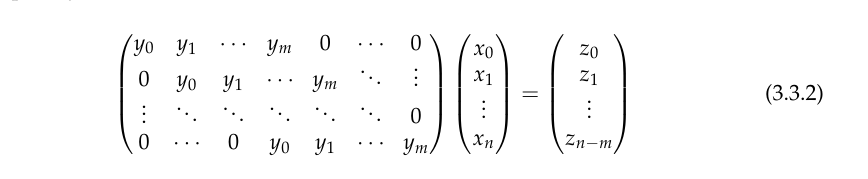

donde $m=N_y - 1$ y $n = N_x -1$.

Muy bien hasta aca, pero que pasa con padding y striding.



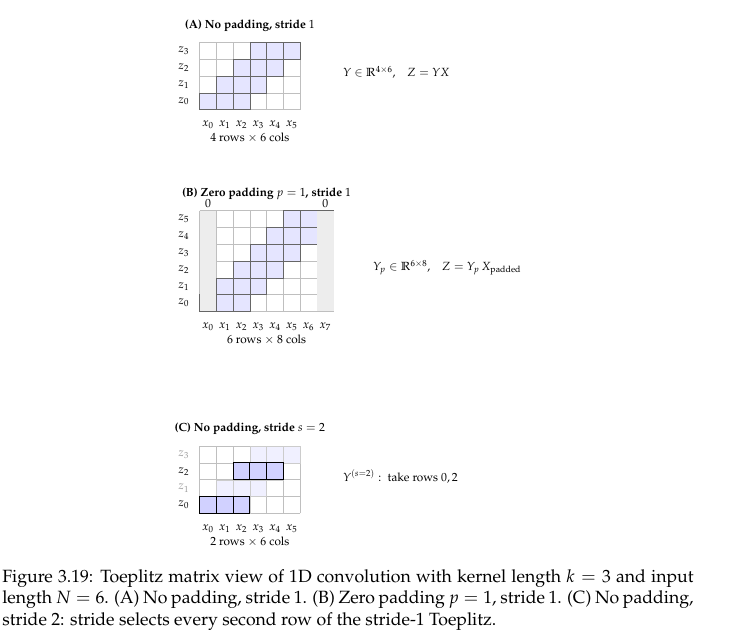

### Convolucion para dimensiones mas altas. Tensores de rango 2.
Recordemos la definicion de convolucion para matrices.

$$z_{ij} = (x \ast y )_{jk} = \sum_{m=0}^{M_y - 1} \sum_{n=0}^{N_y-1} y_{mn} x_{m+j \; n+k}  $$

$$j=0,1, \cdots, M_x - M_y \quad , \quad  k = 0, 1, \cdots, N_x -N_y $$

Con dos graficas recordamos este tipo de convoluciones.

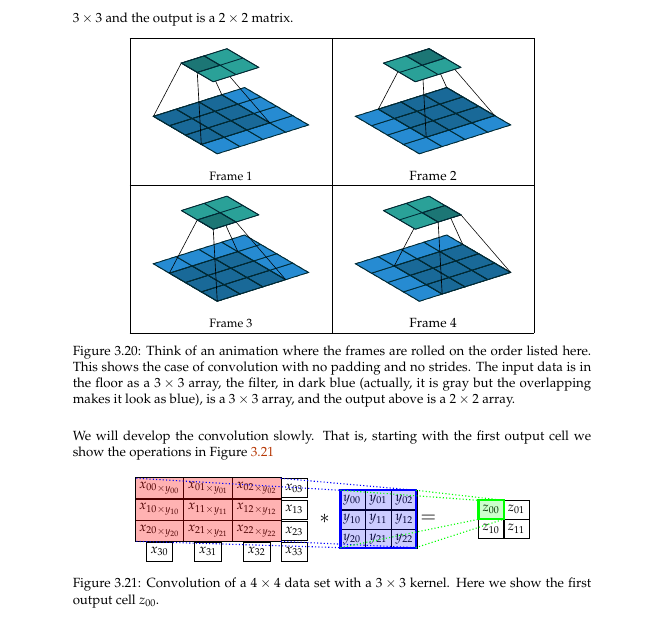

Observemos en la Figura 3.21 que

\begin{eqnarray}
z_{00} &=& x_{00} y_{00} + x_{01} y_{01} + x_{02} y_{02}   \\
&+& x_{10} y_{10} + x_{11} y_{11} + x_{12} y_{12} + \\
&+& x_{20} y_{20} + x_{21} y_{21} + x_{22} y_{22} \\
\end{eqnarray}

Si yo no vectorizo estas operaciones tendria que pensar en tensores de rango 4 y esto es complicado.  Hacemos el siguiente mapeo

\begin{eqnarray}
z_{00} &\to& z_0 \\
y_{00} &\to & y_0 \quad y_{01} \to y_1  \quad y_{02} \to y_2  \\
y_{10} &\to & y_3 \quad y_{11} \to y_4  \quad y_{12} \to y_5  \\
y_{20} &\to & y_6 \quad y_{11} \to y_7  \quad y_{12} \to y_8  \\
\end{eqnarray}

Pense la formula general

$$y_{ij} \to y_{i \times N_y+j} $$

i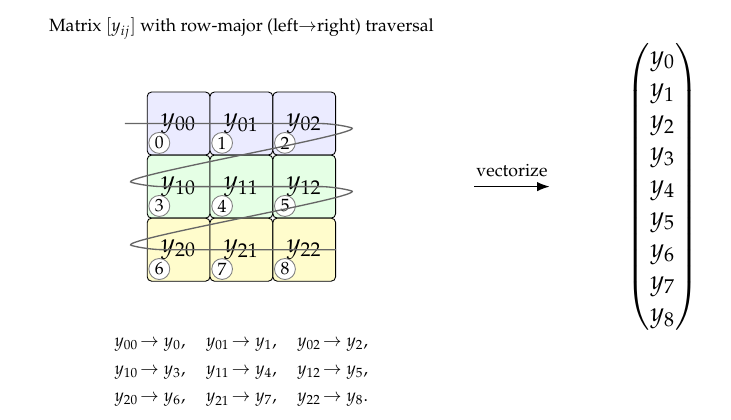

En cuanto a la matriz $x$

\begin{eqnarray}
x_{00} &\to& x_0 \quad x_{01} \to x_1 \quad x_{02} \to x_2 & x_{03} \to x_3 \\
x_{10} &\to& x_4 \quad x_{11} \to x_5 \quad x_{12} \to x_6 & x_{13} \to x_7 \\
x_{20} &\to& x_8 \quad x_{21} \to x_9 \quad x_{22} \to x_{10} & x_{23} \to x_{11} \\
x_{30} &\to& x_{12} \quad x_{31} \to x_{12} \quad x_{32} \to x_{14} & x_{33} \to x_{15} \\
\end{eqnarray}
La formula general es

$$x_{ij} \to x_{i \times N_x + j} $$

Volvamos a escribir $z_0$ de una forma mas practica.

\begin{eqnarray}
z_{0} &=& x_{0} y_{0} + x_{1} y_{1} + x_{2} y_{2} + x_3 \times 0    \\
&+& x_{4} y_{3} + x_{5} y_{4} + x_{6} y_{5} + x_7 \times 0  \\
&+& x_{8} y_{6} + x_{9} y_{7} + x_{10} y_{8} + x_{11} \times 0  \\
&+& x_{12} \times 0 + x_{13} \times 0 + x_{14} \times 0 + x_{15} \times 0 .
\end{eqnarray}

Escribamos esto como un producto interno.

$$y=(y_0, y_1, y_2, 0, y_3, y_4, y_5, 0, y_6, y_7, y_8, 0, 0, 0, 0, 0) $$
y
$$ x = \begin{pmatrix} x_0 \\ x_1 \\ \vdots & \\ x_{15} \end{pmatrix}  $$

Veamos el caso para $z_{01}$



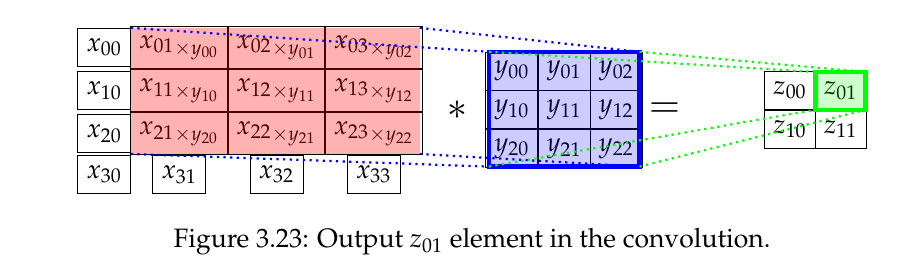

La componente $z_{01}$ es

\begin{eqnarray}
z_{01} &=& x_00 \times 0 + x_{01} y_{00} + x_{02} y_{01} + x_{03} y_{02} \\
&+& x_{10} \times 0 + x_{11} y_{10} + x_{12} y_{11} + x_{13} y_{12}  \\
&+& x_{20} \times 0 + x_{21} y_{20} + x_{22} y_{21} + x_{23} y_{22} \\
&=& x_{30} \times 0 + x_{31} \times 0 + x_{32} \times 0 + x_{33} \times 0.
\end{eqnarray}
Haciendo el " mapping"


\begin{eqnarray}
z_{1} &=& x_0 \times 0 + x_{1} y_{0} + x_{2} y_{1} + x_{3} y_{2} \\
&+& x_{4} \times 0 + x_{5} y_{3} + x_{6} y_{4} + x_{7} y_{5}  \\
&+& x_{8} \times 0 + x_{9} y_{6} + x_{10} y_{7} + x_{11} y_{8} \\
&=& x_{12} \times 0 + x_{13} \times 0 + x_{14} \times 0 + x_{15} \times 0.
\end{eqnarray}

Esto se puede ver como el producto punto de dos vectores


$$y = (0 \; y_0 \,  y_1 \, y_2 \, 0  \, y_3 \, y_4 \, y_5 \, 0 \, y_6 \, y_7 \, y_8 \, 0 \, 0 \, 0) \quad x = \begin{pmatrix} x_0 \\ x_1 \\ \vdots & \\ x_{15} \end{pmatrix} $$

Ahora analizamos la salida de $z_{10}$.





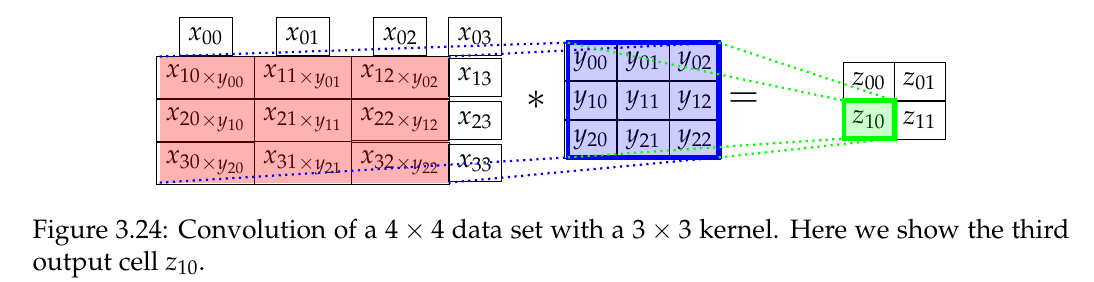

$$y = (0 \; 0 \,  0  \, 0  \, y_0  \, y_1 \, y_2 \, 0 \, y_3 \, y_4 \, y_5 \, 0  \,  y_6 \, y_7 \, y_8, 0 ) \quad x = \begin{pmatrix} x_0 \\ x_1 \\ \vdots & \\ x_{15} \end{pmatrix} $$

Finalmente para el de $z_{11}$,

$$y = (0 \; 0 \,  0  \, 0  \, 0  \, y_0  \, y_1 \, y_2 \, 0 \, y_3 \, y_4 \, y_5 \, 0  \,  y_6 \, y_7 \, y_8) \quad x = \begin{pmatrix} x_0 \\ x_1 \\ \vdots & \\ x_{15} \end{pmatrix} $$

Los cuatro productos puntos para producir $Z$ se escriben en forma matricial como.




i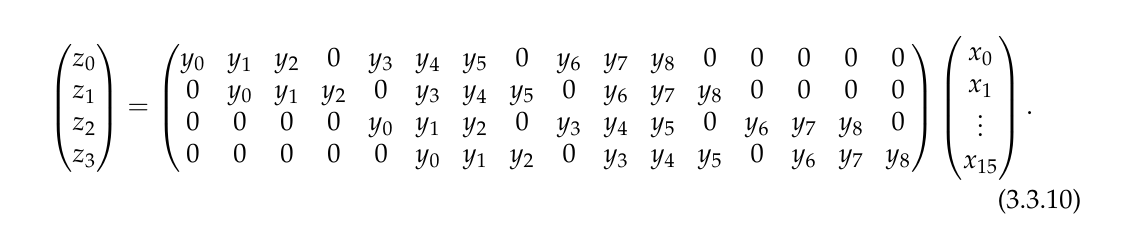

El patron es el siguiente. Asuma un kernel $M_y \times N_y$ y los datos $M_x \times N_x$. Desenrollamos (`Pytho` flatten) las matrices $x,y$. En el momento no hacemos padding ni striding (lo dejo de tarea).

* Primer escriba en la primera fila $y_0, y_1, \cdots, y_{N_y-1}$, seguido de $N_x - N_y$ ceros hasta que agoten los $y_i$ y rellean con ceros hasta ajustar las columnas $N_x$. Al final aparecen filas de puros ceros, Tantos como el numero de celdas vacias $(M_x - M_y) \times (N_x - N_y)$.

* Si el filtro se mueve a la dereacha, entonces movemos la proxima fila un lugar y truncamos con ceros al final. El primer lugar (columna) tiene un 0. Si el filtro se mueve hacia abajo, quedan tantos ceros al cominzo com las columnas de $x$, todo se corre $N_x$.

Dejamos de tarea estudiar el padding y el striping para una convolucion mirada de forma matrical como en este caso.

### Convolucion transpuesta.
Observamos que $Z= Y X$ en este ejercicio como se muestra en la Ecuacion (3.3.10).

Entondces la convolucion transpuesta se define como

$$X = Y^T Z $$
Ojo, el $X$ no se recobra. Veamos la dimensionalidad. En este ejemplo

$$ X \in \mathbb{R}^{16 \times 1} \quad , \quad Y \in \mathbb{R}^{4 \times 16} \quad , \quad Z \in \mathbb{R}^{4 \times 1}$$

Etonces las dimensiones de $Z$ son $ (4 \times 16) \times (16 \times 1) $

Ahora para las dimensiones de $X$

$$ (16 \times 4) \times (4 \times 1) \to 16 \times 1$$

En este sentido el vector $X$ va de $4$ dimensiones a 16 dimensiones
(de $2 \times 2$ a $4 \times 4$). Es decir, en este sentido la convolucion transpuesta es un **upscaling**.

Entonces como se ve el sistema $X= Y^T Z$?



Recuerden las series de Fourier. Toda funcion continua ( y hasta descontinuas) se puede representar con suma de senos y cosenos con pesos (frecuencias y fases) tan cerca como quisieramos. Hay un teorema que se llama **universalida**. Cualquier funcion integrable (Lebesgue) se puede escribir como una suma de funciones de activacion con pesos, fases) tan preciso como se necesite.

cerramos parentesis:



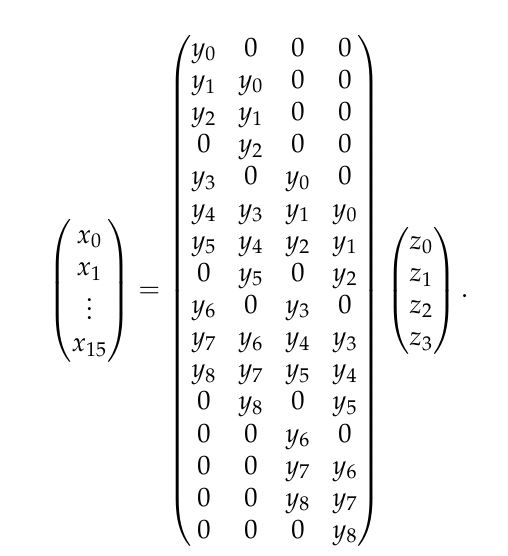

Recuerden que nuestros datos iniciales son matrices.


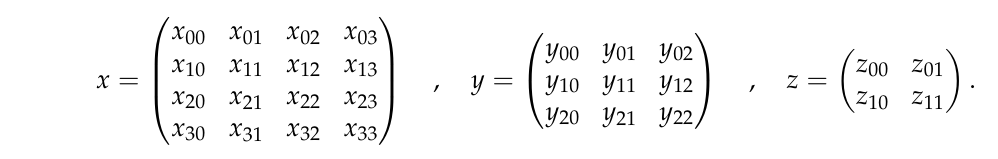

Estudiemos la convolucion transpuesta en matrices (no vectores).

Mirando la matriz de arriba

$$x_{00} = z_{00} y_{00} + 0 z_{02} + 0 z_{10} + 0 z_{11} $$

La Figura 3.25 muestra la representacion grafica de esta ecuacion.

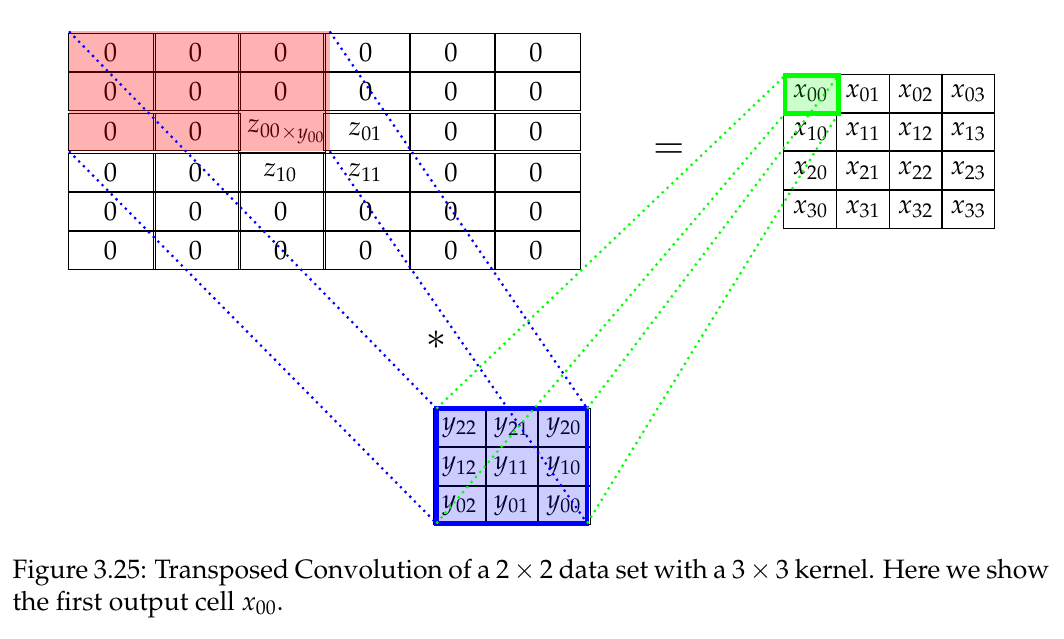

Veamos el caso de $x_{11}$.

$$x_{11} = z_{00} y_{11} + z_{01} y_{10} + z_{10} y_{01}  + z_{11} y_{00} . $$

Representacion grafica de esto en la Figura 3.26

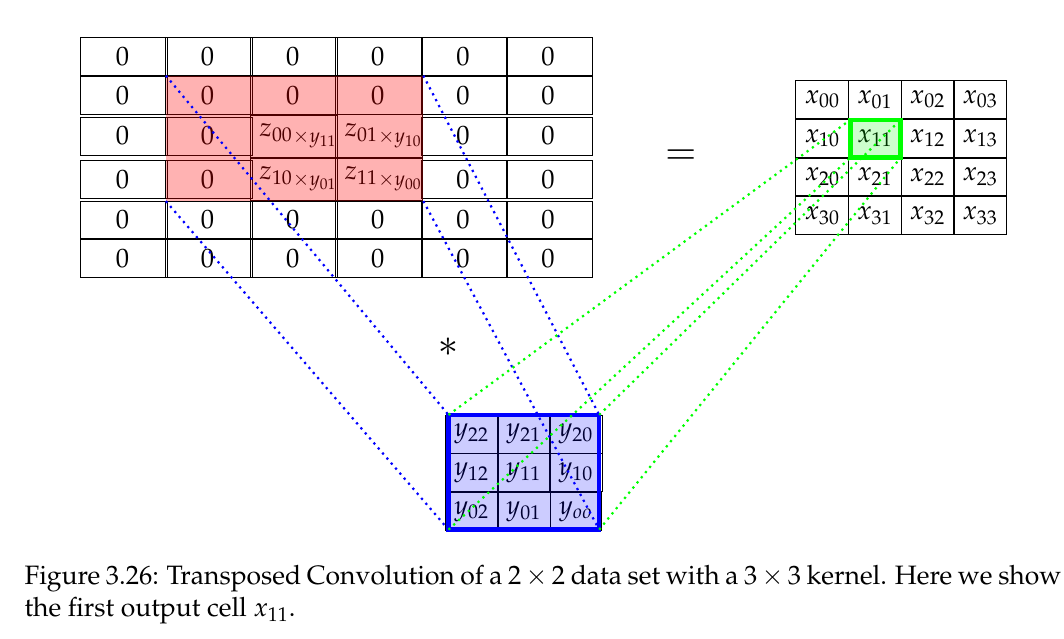

El algoritmo para hacer la convolucion transpuesta es como sigue.


* Pensemos en la convolucion corriente. Dado una matriz $x$ con dimensiones $M_x, N_x$, y un kernel $M_y, N_y$ hacemos la convolucion con padding 0 y striding $S=1$. Las dimensiones de salida con $M_z =( M_x - M_y + 1) \times (N_x - N_y + 1)$

* El problema transpuesto. Datos unos dastos $z$ con dimensiones $M_z, N_z$ tome el filtro $M_y, N_y$, reverse el orden en filas y columnas (como el gato en la clase anterior), "reshape".
En `Python` le hace un `flat`, revera el orden y luego un `reshape`.


Luego hagale padding a $z$. Que valor tiene $p$?.  Y luego se hace la convolucion regular $X=Y^T Z$.

Veamos como averiguar el padding.
El problema original tiene $M_x, N_x$ y queremos que estas sean las muestra de salida del transpuesto.
Haciendo cuentas
Salida $z$ con $M_z \times N_z$
Filtro $y$ con $M_y \times N_y$
Salida $x$ con $M_x \times N_x$

$$ M_z - M_y + 2 p_M + 1 = M_x $$
$$ N_z - N_y + 2 p_N + 1 = N_x $$



Despejemos $p_M$ de la primera ecuacion

$$p_m = \frac{M_x - M_z + M_y - 1}{2} $$

Verifiquemos con el ejemplo.
$M_x=4, M_z=2, M_y=3$

$$p_m = \frac{4 - 2 + 3  - 1}{2} = \frac{4}{2} = 2 .$$

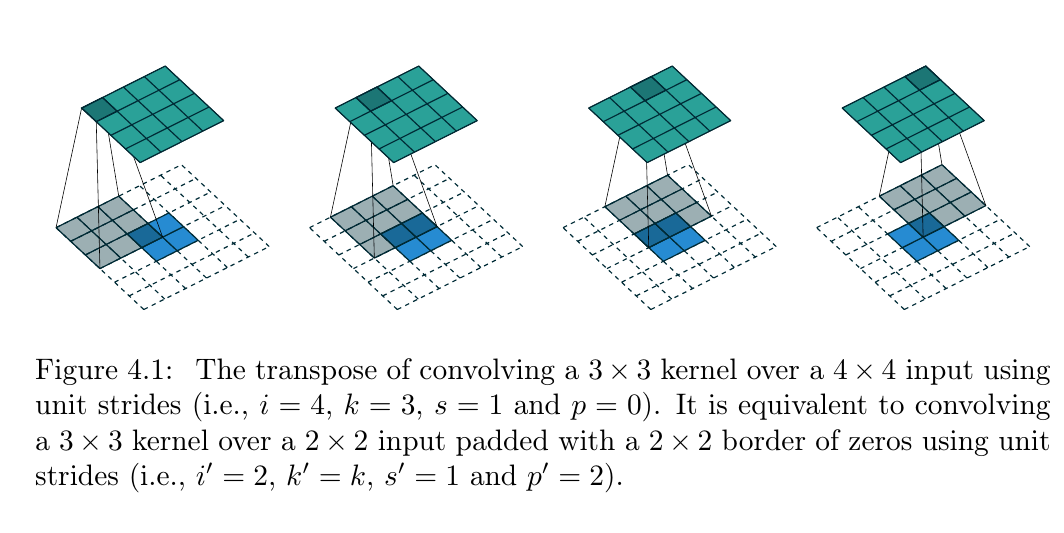